Epoch 1/10
4/4 [==============================] - 2s 119ms/step - loss: 0.6732 - accuracy: 0.5714 - val_loss: 0.6531 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.5714 - val_loss: 0.6524 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6611 - accuracy: 0.7143 - val_loss: 0.6508 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6743 - accuracy: 0.5714 - val_loss: 0.6480 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6729 - accuracy: 0.5714 - val_loss: 0.6445 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6510 - accuracy: 0.5714 - val_loss: 0.6423 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6590 - accuracy: 0.7143 - val_loss: 0.6389 - val_accuracy: 0.5000
Epoch 8/10
4/4 [============

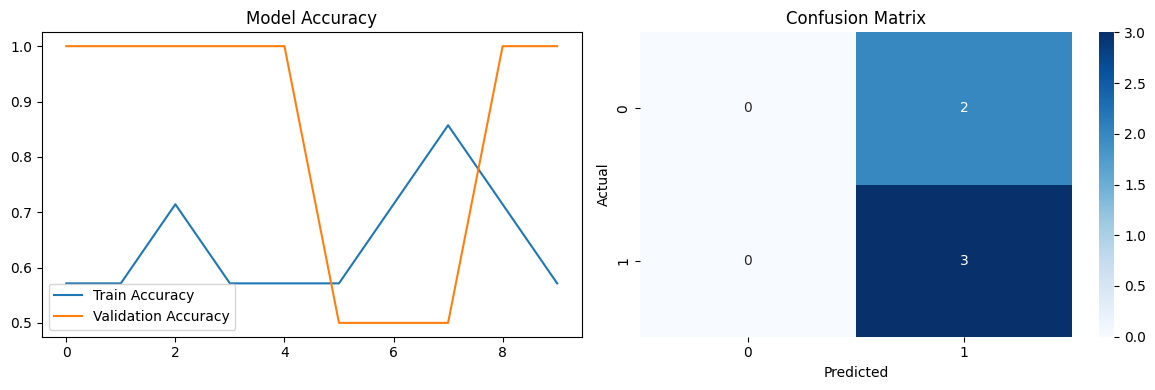

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('weather_forecast.csv')

# Convert categorical features to numerical
label_encoders = {}
categorical_cols = ['Outlook', 'Temperature', 'Humidity', 'Windy']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-hot encode features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])

# Prepare target variable
target = df['Play'].map({'Yes': 1, 'No': 0}).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    encoded_features, target, test_size=0.3, random_state=42
)

# Reshape data for LSTM (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=2,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualization
plt.figure(figsize=(12, 4))

# Plot training history
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
